In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats

In [109]:
# marketing funnel
df_closed = pd.read_csv('Marketing_Funnel_Olist/olist_closed_deals_dataset.csv')
df_qualified = pd.read_csv('Marketing_Funnel_Olist/olist_marketing_qualified_leads_dataset.csv')

# customers
df_items = pd.read_csv('Brazilian_E_commerce_Olist/olist_order_items_dataset.csv')
df_payments = pd.read_csv('Brazilian_E_commerce_Olist/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('Brazilian_E_commerce_Olist/olist_orders_dataset.csv')

df_cus = pd.read_csv('Brazilian_E_commerce_Olist/olist_customers_dataset.csv')
df_geo = pd.read_csv('Brazilian_E_commerce_Olist/olist_geolocation_dataset.csv')
df_products = pd.read_csv('Brazilian_E_commerce_Olist/olist_products_dataset.csv')
df_sellers = pd.read_csv('Brazilian_E_commerce_Olist/olist_sellers_dataset.csv')

df_translate = pd.read_csv('Brazilian_E_commerce_Olist/product_category_name_translation.csv')

In [110]:
df_qualified

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
...,...,...,...,...
7995,feaba3ffcd2ff97501696c7f9a42f41c,2018-05-22,e42a14209c69c3e9cc6b042620465f12,paid_search
7996,a79cb53cd009ab92e0143b92baa2407b,2018-03-27,c494978688ccf66ad9fad3d6a3338c22,paid_search
7997,68f049a23ab109c6a0f6989bb9a02994,2017-08-27,b48ec5f3b04e9068441002a19df93c6c,organic_search
7998,4f8c96e2509b984329044c6682c88ee9,2017-10-06,a56671a54260a44923d32c2f08fad39c,organic_search


- 유료 유입은 paid_search, social, display가 있다.

In [111]:
df_qualified.groupby('origin').count()

,mql_id,first_contact_date,landing_page_id
origin,,,
direct_traffic,499,499,499
display,118,118,118
email,493,493,493
organic_search,2296,2296,2296
other,150,150,150
other_publicities,65,65,65
paid_search,1586,1586,1586
referral,284,284,284
social,1350,1350,1350


In [112]:
df_funnel = df_qualified.merge(df_closed, on='mql_id', how='inner')

### 데이터 병합
- mql_id 기준으로 marketing funnel 먼저

In [113]:
# marketing funnel 데이터 병합
df_funnel = df_qualified.merge(df_closed, on='mql_id', how='inner')

# df_funnel과 df_sellers 병합
df_funnel_sellers = df_funnel.merge(df_sellers, on='seller_id', how='inner')

# df_items 데이터 셋과 합치기
df_funnel_sellers_items = df_funnel_sellers.merge(df_items, on='seller_id', how='left')

df_funnel_sellers_items

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,30421,belo horizonte,MG,1efcc6ba75b519535a510c53153a9256,1,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76
1,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,30421,belo horizonte,MG,d8d281c1a1398a1e835fdc4adfb81e2a,1,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41
2,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,30421,belo horizonte,MG,e5858127da61f07285827883e605254b,1,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00
3,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,0.0,93542,novo hamburgo,RS,0475d054d40280dfba750663c9ad7a0a,1,a86859b91d632c991b914aead6ec8ad4,2018-08-07 17:35:18,49.9,13.69
4,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,0.0,93542,novo hamburgo,RS,05104976125ea1e5cc04bc1f506a436a,1,63bfa27a0cee21fd896dc27f58b6d656,2018-08-19 22:44:03,198.9,18.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,0.0,8275,sao paulo,SP,56aa3b6b2c30314ee80914fea9543573,1,059edbecfc72eba55fbd079a25c4ab6b,2018-08-14 20:04:53,35.0,9.00
5040,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,0.0,8275,sao paulo,SP,935cbf337f50d03fc7ecfb5a601dc7fc,1,1b34de23397f9ce6cd0f7afa27b60eac,2018-07-31 08:25:14,38.5,19.18
5041,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,0.0,8275,sao paulo,SP,e8253edb8afd8c06fed540435eac942d,1,1b770da1c339c216e545d69ee2965da1,2018-07-25 02:42:34,44.9,15.41
5042,98b18a14a0472c9e4a4eb0bb77ae3592,2018-02-03,22c29808c4f815213303f8933030604c,organic_search,4fe2f67634d00c021aa01f96b6f2d68e,9d12ef1a7eca3ec58c545c678af7869c,a8387c01a09e99ce014107505b92388c,2018-06-07 21:23:45,food_supplement,online_small,...,0.0,87035,maringa,PR,52dbb0b466455091f16336d2774c70f2,1,22234a1dd91ce8e88c7b108d198c40ad,2018-08-20 21:10:13,54.9,18.48


In [114]:
df_funnel_sellers_items.isna().sum()

mql_id                              0
first_contact_date                  0
landing_page_id                     0
origin                             11
seller_id                           0
sdr_id                              0
sr_id                               0
won_date                            0
business_segment                    0
lead_type                          48
lead_behaviour_profile           1741
has_company                      5014
has_gtin                         5014
average_stock                    5014
business_type                       5
declared_product_catalog_size    5044
declared_monthly_revenue            0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
order_id                            0
order_item_id                       0
product_id                          0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [115]:
# 최근 활동 날짜를 구해주기 위해서 df_orders 데이터를 합쳐주자.
# df_orders에서 order_approved_at 컬럼 활용. (결제 승인 날짜 컬럼)
df_funnel_sellers_items_order = df_funnel_sellers_items.merge(df_orders, on='order_id', how='left')
df_funnel_sellers_items_order

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,2018-06-26 22:20:21,94.2,18.76,27a878219114302047d41366ffeeba1e,delivered,2018-06-20 21:40:18,2018-06-20 22:20:21,2018-06-22 15:23:00,2018-06-26 20:06:25,2018-07-17 00:00:00
1,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,2018-07-30 09:31:49,664.0,38.41,14c1e4101ca2dc7dbf876d9c9e6b11a6,delivered,2018-07-23 20:50:50,2018-07-24 10:31:11,2018-07-25 15:09:00,2018-07-27 18:27:42,2018-08-07 00:00:00
2,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,2018-06-27 16:00:04,99.8,15.00,bcd15e6f5399f2899de4482cf6783dae,delivered,2018-06-21 15:42:55,2018-06-21 16:00:04,2018-06-22 15:23:00,2018-06-25 14:28:27,2018-07-13 00:00:00
3,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,2018-08-07 17:35:18,49.9,13.69,5c232e92346113f68998cf6395eb457f,delivered,2018-07-24 17:25:33,2018-07-24 17:35:18,2018-07-31 14:18:00,2018-08-03 18:41:28,2018-08-17 00:00:00
4,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,...,2018-08-19 22:44:03,198.9,18.32,161045ee99ad91883dbc1a6d26127785,delivered,2018-08-14 11:44:44,2018-08-15 22:44:03,2018-08-20 13:31:00,2018-08-25 15:15:32,2018-08-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,2018-08-14 20:04:53,35.0,9.00,70972230081174ffa0f073a7fa56d95e,delivered,2018-08-08 19:46:37,2018-08-08 20:04:53,2018-08-09 15:15:00,2018-08-10 20:48:30,2018-08-17 00:00:00
5040,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,2018-07-31 08:25:14,38.5,19.18,78e5e5a5de6f4de446c8eb4509755a13,delivered,2018-07-25 08:15:09,2018-07-25 08:25:14,2018-07-26 13:44:00,2018-08-01 20:35:40,2018-08-15 00:00:00
5041,676207ddcc8087437135a4b461fc07cb,2018-04-08,58326e62183c14b0c03085c33b9fdc44,social,c70a353f02429c00775a46a75fb787da,370c9f455f93a9a96cbe9bea48e70033,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-20 12:27:44,health_beauty,online_medium,...,2018-07-25 02:42:34,44.9,15.41,6c435ed0cfd0b31d333015f5a2cdb2d5,delivered,2018-07-17 18:27:15,2018-07-19 02:42:34,2018-07-20 13:20:00,2018-07-28 00:58:37,2018-08-07 00:00:00
5042,98b18a14a0472c9e4a4eb0bb77ae3592,2018-02-03,22c29808c4f815213303f8933030604c,organic_search,4fe2f67634d00c021aa01f96b6f2d68e,9d12ef1a7eca3ec58c545c678af7869c,a8387c01a09e99ce014107505b92388c,2018-06-07 21:23:45,food_supplement,online_small,...,2018-08-20 21:10:13,54.9,18.48,7fbcc0b4261e7dd3

In [116]:
df_funnel_sellers_items_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 5043
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         5044 non-null   object 
 1   first_contact_date             5044 non-null   object 
 2   landing_page_id                5044 non-null   object 
 3   origin                         5033 non-null   object 
 4   seller_id                      5044 non-null   object 
 5   sdr_id                         5044 non-null   object 
 6   sr_id                          5044 non-null   object 
 7   won_date                       5044 non-null   object 
 8   business_segment               5044 non-null   object 
 9   lead_type                      4996 non-null   object 
 10  lead_behaviour_profile         3303 non-null   object 
 11  has_company                    30 non-null     object 
 12  has_gtin                       30 non-null     o

In [117]:
df_total = df_funnel_sellers_items_order.copy()

In [118]:
# 셀러 별 얻은 총 수익
df_total['sum_revenue'] = df_total['price'] - df_total['freight_value']

In [119]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5044 entries, 0 to 5043
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         5044 non-null   object 
 1   first_contact_date             5044 non-null   object 
 2   landing_page_id                5044 non-null   object 
 3   origin                         5033 non-null   object 
 4   seller_id                      5044 non-null   object 
 5   sdr_id                         5044 non-null   object 
 6   sr_id                          5044 non-null   object 
 7   won_date                       5044 non-null   object 
 8   business_segment               5044 non-null   object 
 9   lead_type                      4996 non-null   object 
 10  lead_behaviour_profile         3303 non-null   object 
 11  has_company                    30 non-null     object 
 12  has_gtin                       30 non-null     o

In [120]:
df_GB = df_total.groupby('seller_id')['sum_revenue'].sum()

In [121]:
df_GB

seller_id
01266d4c46afa519678d16a8b683d325      43.02
01fd077212124329bac32490e8ef80d9     632.64
02f623a8eb246f3c5f7c2f96462654e6    5548.37
03a2a6dcbe45d639c4dc2a0d24769c40     906.16
044668ccd5316b12a7cf0d54a156e3e9      84.25
                                     ...   
fd435faa3c0422b60440ea3480d0e77c     615.13
fe87f472055fbcf1d7e691c00b1560dc     955.64
ffa6adafb71b807dc13159e26431354c    2132.82
ffad1e7127fb622cb64a900751590acd     677.77
ffc470761de7d0232558ba5e786e57b7    1210.89
Name: sum_revenue, Length: 380, dtype: float64

### 병합 결과
- seller_id로 group by 했을 때, 데이터의 양이 많이 적어진다.
- 통상적으로 머신러닝 모델을 돌리기 위해서 최소 1000개~10000개 까지는 데이터가 확보되어야 하는데, 380개는 너무 적다.
- 이후 data augmentaion을 찾아보고, 이를 활용해보는 방법도 생각해보자.

 :https://velog.io/@ysn003/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0-Augmentation-%EB%B0%A9%EB%B2%95-%EC%A0%95%EB%A6%AC
- 하지만, 분석과 인사이트 도출에 초점을 맞춘다면, 데이터가 크지 않더라도, 그 데이터에서 도출해내는 것이 분석가의 역량이기 때문에, 패턴과 인사이트를 최대한 찾아내보자.
- 실제로 비즈니스에서도, 생각해보면 회사 과제들에서도 10000개 이상의 데이터를 준 적은 거의 없다. 분석가로써 할 수 있는 분석을 최대한 해보자.
- 참고 사이트

 :https://brunch.co.kr/@8d1b089f514b4d5/21
 :http://taewan.kim/tutorial_manual/ml_yearning/020.setup_dev_test_set/7/
- 가설 검정 및 통계를 활용해서 분석해보자


### 1. 먼저 할 수 있는 것 중, 판매자의 LifeTime을 확인해보자.
- order_approved_at과 won_date의 차이로 LifeTime을 먼저 구해보자

In [122]:
df_GB__ = df_total.groupby(['seller_id','origin','business_segment']).agg({'sum_revenue':'sum', 'seller_id':'count', 'won_date':'min', 'order_approved_at':'max'})

In [123]:
df_GB__.rename(columns = {'seller_id':'num_selles'}, inplace = True)

In [124]:
df_GB__.reset_index(drop = False, inplace = True)

In [125]:
df_GB__

,seller_id,origin,business_segment,sum_revenue,num_selles,won_date,order_approved_at
0,01266d4c46afa519678d16a8b683d325,unknown,construction_tools_house_garden,43.02,3,2018-05-18 20:02:04,2018-08-21 04:55:37
1,01fd077212124329bac32490e8ef80d9,unknown,household_utilities,632.64,39,2018-03-28 22:45:45,2018-08-25 04:05:18
2,02f623a8eb246f3c5f7c2f96462654e6,organic_search,sports_leisure,5548.37,44,2018-04-18 20:16:19,2018-08-23 00:05:16
3,03a2a6dcbe45d639c4dc2a0d24769c40,social,construction_tools_house_garden,906.16,9,2018-02-09 18:11:10,2018-08-15 18:35:13
4,044668ccd5316b12a7cf0d54a156e3e9,unknown,food_drink,84.25,4,2018-01-31 21:00:13,2018-08-20 21:30:01
...,...,...,...,...,...,...,...
371,fd435faa3c0422b60440ea3480d0e77c,unknown,music_instruments,615.13,1,2018-07-26 17:03:01,2018-08-20 14:11:42
372,fe87f472055fbcf1d7e691c00b1560dc,other,home_decor,955.64,6,2018-01-23 12:41:16,2018-08-20 13:30:46
373,ffa6adafb71b807dc13159e26431354c,organic_search,car_accessories,2132.82,18,2018-02-20 17:44:19,2018-08-14 04:25:23
374,ffad1e7127fb622cb64a900751590acd,organic_search,home_decor,677.77,15,2018-02-02 20:42:47,2018-07-14 18:04:15


In [126]:
# Retention 계산
# order_approved_at와 won_date 이 str형태이기 때문에, to_datetime 적용먼저
df_GB__['order_approved_at'] = pd.to_datetime(df_GB__['order_approved_at'])
df_GB__['won_date'] = pd.to_datetime(df_GB__['won_date'])

# 이제 Retention 계산
df_GB__['LifeTime'] = df_GB__['order_approved_at'] - df_GB__['won_date']

In [127]:
df_GB__

,seller_id,origin,business_segment,sum_revenue,num_selles,won_date,order_approved_at,LifeTime
0,01266d4c46afa519678d16a8b683d325,unknown,construction_tools_house_garden,43.02,3,2018-05-18 20:02:04,2018-08-21 04:55:37,94 days 08:53:33
1,01fd077212124329bac32490e8ef80d9,unknown,household_utilities,632.64,39,2018-03-28 22:45:45,2018-08-25 04:05:18,149 days 05:19:33
2,02f623a8eb246f3c5f7c2f96462654e6,organic_search,sports_leisure,5548.37,44,2018-04-18 20:16:19,2018-08-23 00:05:16,126 days 03:48:57
3,03a2a6dcbe45d639c4dc2a0d24769c40,social,construction_tools_house_garden,906.16,9,2018-02-09 18:11:10,2018-08-15 18:35:13,187 days 00:24:03
4,044668ccd5316b12a7cf0d54a156e3e9,unknown,food_drink,84.25,4,2018-01-31 21:00:13,2018-08-20 21:30:01,201 days 00:29:48
...,...,...,...,...,...,...,...,...
371,fd435faa3c0422b60440ea3480d0e77c,unknown,music_instruments,615.13,1,2018-07-26 17:03:01,2018-08-20 14:11:42,24 days 21:08:41
372,fe87f472055fbcf1d7e691c00b1560dc,other,home_decor,955.64,6,2018-01-23 12:41:16,2018-08-20 13:30:46,209 days 00:49:30
373,ffa6adafb71b807dc13159e26431354c,organic_search,car_accessories,2132.82,18,2018-02-20 17:44:19,2018-08-14 04:25:23,174 days 10:41:04
374,ffad1e7127fb622cb64a900751590acd,organic_search,home_decor,677.77,15,2018-02-02 20:42:47,2018-07-14 18:04:15,161 days 21:21:28


In [128]:
df_GB__['LifeTime'].describe()

count                            376
mean     115 days 13:08:35.680851064
std       51 days 00:29:02.360495096
min                  7 days 07:18:08
25%                 81 days 21:10:10
50%                112 days 09:39:41
75%         154 days 02:29:48.500000
max                220 days 22:18:54
Name: LifeTime, dtype: object

In [129]:
df_final = df_GB__.copy()

### 적용 개념들
- Whale curves: 상위 20%가 매출의 80%를 차지하는것이 아닌, 상위 1%가 매출의 80%를 차지한다면, 기형적인 구조이기 때문에 다양한 문제가 발생할 수 있다. 그렇기때문에 이 구조를 보고 진단할 필요가 있음
- Fragmentation(분산화 정도): (판매자-구매자)의 비중이 (다수-소수), (다수-다수), (소수-다수) 등이 있는데, 마켓플레이스 입장에서 (소수-소수)인 경우에 미들맨의 역할이 중요하지 않기 때문에 위험한 상황이다. 가장 이상적인 모양은 (다수-다수)이다. 그렇기 때문에 Fragmentation을 확인해보고 서비스 상태를 확인할 필요가 있다.
- 참고링크: https://brunch.co.kr/@taewookim/17

#### Whale curves
- '판매자의 수익성'을 Whale curve로 살펴보자
- 수익성의 계산 기준을 정하는게 우선
- 그냥 합계로 계산하기. 평균으로 계산하면 의미가 없어지니 주의할 것.
- 판매자들의 수익성 구간은 각 상위에서부터 10%씩 끊어서 정하고, 판매자의 수를 세보자
- 참고링크: https://m.blog.naver.com/bs2k/221595234106

In [130]:
# 셀러 아이디와 수익성만 추출
df_for_whale = df_final[['seller_id', 'sum_revenue']]

In [131]:
# 수익성 순으로 정렬
df_for_whale = df_for_whale.sort_values('sum_revenue')

In [132]:
df_for_whale.head(10)

,seller_id,sum_revenue
121,56e361f411e38dcef17cdc2a3d99628b,-559.76
233,9d213f303afae4983637247556438ede,-25.41
268,bb7ad8a45c027be8ab075b8e465f8ca0,-12.66
70,33d677f27a69b84051204ee4ae76eaca,-8.49
229,9b1f656ca3060f8af17a50d8a024b533,-6.68
94,455befea1bb853c75ccbca94cff26e5c,-2.07
128,5a4236931428800e9d9cc04af0987118,-0.72
208,8b181ee5518df84f18f4e1a43fe07923,0.82
115,539ed9e19811677513447759be5eccfc,1.74
60,2cb98e27ce1c18abdb42209b34c382a7,5.28


- 마이너스 수익을 가져온 셀러들은 어떻게 처리할까?
- 일단 필요한 데이터이니, 그래프에는 포함시켜서 표시하자

In [133]:
## 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [134]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

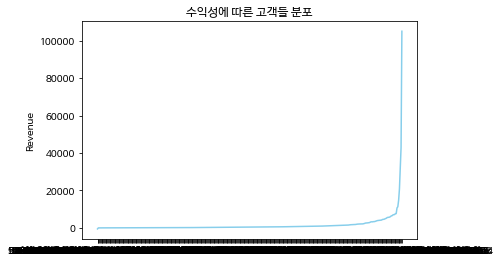

In [135]:
x_label = list(df_for_whale['seller_id'])
y_label = list(df_for_whale['sum_revenue'])

plt.plot(x_label, y_label,
         color='skyblue')

plt.title('수익성에 따른 고객들 분포')
plt.ylabel('Revenue')
plt.show()
plt.close()

- 한 쪽으로 많이 치우쳐있다. 고객들을 구간별(10%)로 나눈 뒤 Whale curve를 그려보자

In [136]:
# 수익성(sum_revenue)으로 10% 구간 구하기
# pd.cut()은 동일한 길이로 나누는 것이고, pd.qcut()은 동일한 갯수로 나누는 것.

# 최소 수익성 판매자
min_revenue = df_for_whale['sum_revenue'].min()
max_revenue = df_for_whale['sum_revenue'].max()

In [137]:
min_revenue

-559.7600000000002

In [138]:
max_revenue

104996.92

In [139]:
# 10개 구간으로 나누고, 라벨을 붙여주기
# 예) 하위 10%까지는 라벨이 '0', 상위 10%는 라벨이 '9'
df_for_whale['ratio_revenue'] = pd.cut(df_for_whale['sum_revenue'], 10, 
                                       labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [140]:
df_for_whale.groupby('ratio_revenue')['ratio_revenue'].count()

ratio_revenue
0    369
1      3
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
Name: ratio_revenue, dtype: int64

- 분포가 기형적으로 나왔다. Box plot그려보고 이상값 확인 후에 다시 구간 나눠보자

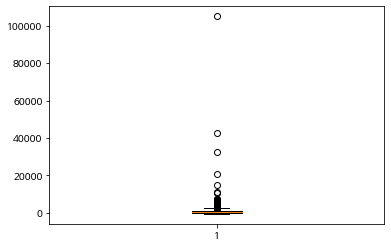

In [141]:
# box plot
plt.boxplot(df_for_whale['sum_revenue'])
plt.show()

In [142]:
# 이상값 제거 하고 다시 그려보자
######## 여기서는 이상값이지만, 실제 큰 판매수익을 거둔 판매자이기에, 고래곡선 이외에서는 함부로 제외하면 안될 것 ########
df_for_whale_renew = df_for_whale[df_for_whale.sum_revenue != max_revenue]

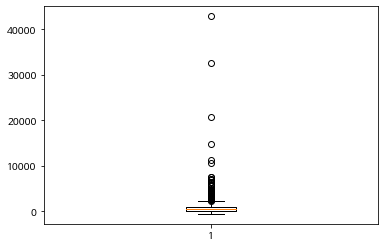

In [143]:
plt.boxplot(df_for_whale_renew['sum_revenue'])
plt.show()

- 아직 큰 이상값이 있다고 판단되지만, 일단 구간을 나눠보자

In [144]:
# 10개 구간으로 나누고, 라벨을 붙여주기
# 예) 하위 10%까지는 라벨이 '0', 상위 10%는 라벨이 '9'
df_for_whale_renew['ratio_revenue'] = pd.cut(df_for_whale_renew['sum_revenue'], 10, 
                                       labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 분포 수
df_for_whale_renew.groupby('ratio_revenue')['ratio_revenue'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ratio_revenue
0    345
1     24
2      2
3      1
4      1
5      0
6      0
7      1
8      0
9      1
Name: ratio_revenue, dtype: int64

- 제일 큰 이상값 하나만 제거했지만, 아직 많은 이상값들이 들어있는 것을 볼 수 있다.
- 이상치 제거하는 방식 중 IQR 활용해서 진행한 뒤 확인해보자
- IQR 참고 링크
 - https://fhaktj8-18.tistory.com/entry/%ED%8C%90%EB%8B%A4%EC%8A%A4-pandas-IQR-%ED%99%9C%EC%9A%A9%ED%95%B4%EC%84%9C-%EC%9D%B4%EC%83%81%EC%A0%90outlier-%EC%B0%BE%EA%B3%A0-%EC%82%AD%EC%A0%9C%ED%95%98%EA%B8%B0
 - https://jimmy-ai.tistory.com/260

In [145]:
# 먼저 사분위수 구하기위해서 describe()로 확인
df_for_whale_renew['sum_revenue'].describe()

count      375.000000
mean      1258.140533
std       3374.300444
min       -559.760000
25%        117.030000
50%        414.640000
75%       1001.215000
max      42901.500000
Name: sum_revenue, dtype: float64

In [146]:
# Q1 - 1.5*IQR = 최소값
# Q3 + 1.5*IQR = 최대값

# 위 공식을 바탕으로 IQR 구하기(이상점)
## IQR은 InterQuartile Range의 줄임말. Q1과 Q3 사이 값. 박스 플롯 기본 수치
Q1 = df_for_whale_renew['sum_revenue'].quantile(0.25)
Q2 = df_for_whale_renew['sum_revenue'].quantile(0.5)
Q3 = df_for_whale_renew['sum_revenue'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

884.185


In [147]:
# 필터 설정
## IQR 기준으로 공식값에 대입해서 이상값 제거
condition = df_for_whale_renew['sum_revenue'] < (Q3 + 1.5*IQR)
df_for_whale_renew = df_for_whale_renew[condition]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


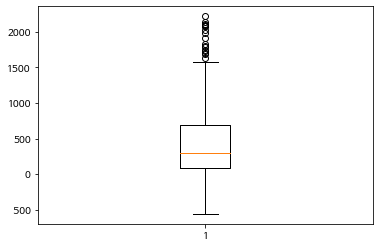

In [148]:
# 이제 다시 Box plot
plt.boxplot(df_for_whale_renew['sum_revenue'])
plt.show()

- 분포가 한쪽으로 많이 skew 되어있다. 고래곡선을 꼭 확인해 볼 필요가 있음.

In [149]:
# 다시 구간 확인
# 10개 구간으로 나누고, 라벨을 붙여주기
# 예) 하위 10%까지는 라벨이 '0', 상위 10%는 라벨이 '9'
df_for_whale_renew['ratio_revenue'] = pd.cut(df_for_whale_renew['sum_revenue'], 10, 
                                       labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

# 분포 수
df_for_whale_renew.groupby('ratio_revenue')['ratio_revenue'].count()

ratio_revenue
0      1
1      4
2    152
3     69
4     34
5     28
6     17
7      7
8      8
9      9
Name: ratio_revenue, dtype: int64

- 해당 분포를 이용해서 고래곡선을 그려보자

In [157]:
df_finally_whale = pd.DataFrame(df_for_whale_renew.groupby('ratio_revenue')['ratio_revenue'].count())

In [158]:
df_finally_whale

,ratio_revenue
ratio_revenue,
0,1
1,4
2,152
3,69
4,34
5,28
6,17
7,7
8,8


In [160]:
# 컬럼 이름 바꿔주기.
df_finally_whale.rename(columns = {'ratio_revenue':'num_of_ratio'}, inplace = True)
# 인덱싱 새로해주기
df_finally_whale.reset_index(drop = False, inplace = True)

In [161]:
df_finally_whale

,ratio_revenue,num_of_ratio
0,0,1
1,1,4
2,2,152
3,3,69
4,4,34
5,5,28
6,6,17
7,7,7
8,8,8
9,9,9


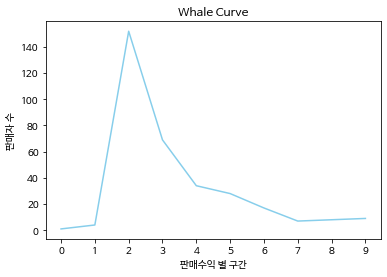

In [162]:
x_label = list(df_finally_whale['ratio_revenue'])
y_label = list(df_finally_whale['num_of_ratio'])

plt.plot(x_label, y_label,
         color='skyblue')

plt.title('Whale Curve')
plt.xlabel('판매수익 별 구간')
plt.ylabel('판매자 수')
plt.show()
plt.close()

- 전혀 고래 모양이 아니다. 해당 현상을 보고 서비스의 수익구조, 판매자 유형 분포 구조가 이상적인 구조가 아니라고 판단할 수 있다. 이에 판매자들의 유형이 Whale Curve를 그릴 수 있는 개선방안이 필요할 것으로 예상된다.